### Table of Contents

* [I. Loading the Dataset](#chapter1)
* [II. Data Exploration](#chapter2)
* [II. Pre-processing the data](#chapter3)
* [IV. Model Training](#chapter4)
* [V. Model Performance Metrics](#chapter5)

### I. Loading the Dataset <a class="anchor" id="chapter1"></a>

In [1]:
 # Read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis']
dataset = pd.read_csv('processed_hungarian.csv', names=col_names)

# Print the first 5 rows of data from the dataframe
print(f' Dataset Shape: {dataset.shape}')
dataset.head()

 Dataset Shape: (294, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [2]:
#transforming all values to numeric type and changing all invalid transformation to Nan
for i in dataset.columns:
    dataset[i] = pd.to_numeric(dataset[i], errors = 'coerce')

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [17]:
#To see statistical details of the dataset,
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


### II. Data Exploration <a class="anchor" id="chapter2"></a>

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
slope        190
ca           291
thal         266
diagnosis      0
dtype: int64


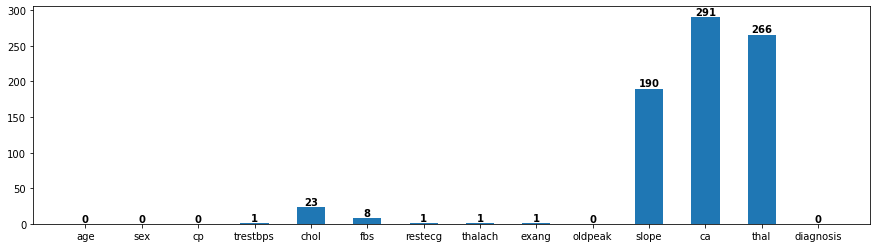

In [18]:
x_val = {'x': ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis']}
df = pd.DataFrame(x_val, columns = ['x'])

x_val_series = df['x'].squeeze()
y = dataset.isnull().sum()
plt.figure(figsize=(15,4))
plt.bar(x_val_series,y, width =0.5)

for j in range(len(y)):
    plt.text(j, y[j], y[j], ha="center", va="bottom", weight = "bold")

print(y)

In [19]:
#dropping features that have missing values more than half of the total observation
dataset.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)
col_names = dataset.columns

======== age ========
Skewness: -0.28426123869355063
Kurtosis: -0.5025373591616304
======== sex ========
Skewness: -1.010104356017189
Kurtosis: -0.9864463008477964
======== cp ========
Skewness: -0.2181714981162021
Kurtosis: -1.4223011512110566
======== trestbps ========
Skewness: 0.7382701998622878
Kurtosis: 0.8103181202244172
======== chol ========
Skewness: 1.4333860428220793
Kurtosis: 4.578469749376957
======== fbs ========
Skewness: 3.3905206787422375
Kurtosis: 9.562453341959891
======== restecg ========
Skewness: 1.983401889114331
Kurtosis: 3.1977215217109918
======== thalach ========
Skewness: -0.08691935558415845
Kurtosis: -0.5898189766313737
======== exang ========
Skewness: 0.8578670756732999
Kurtosis: -1.2727990860423855
======== oldpeak ========
Skewness: 1.5488244196598286
Kurtosis: 2.180743047230856
======== diagnosis ========
Skewness: 0.5838571715689087
Kurtosis: -1.670521595580554


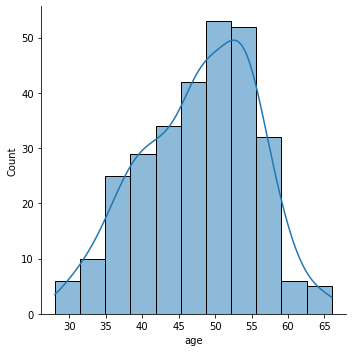

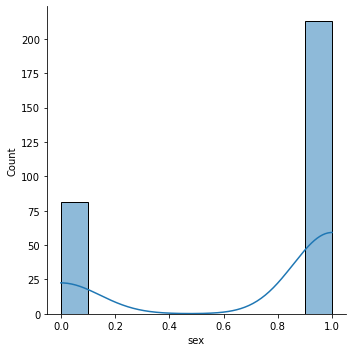

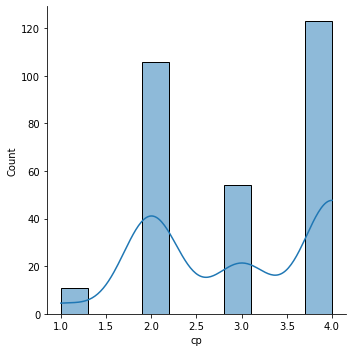

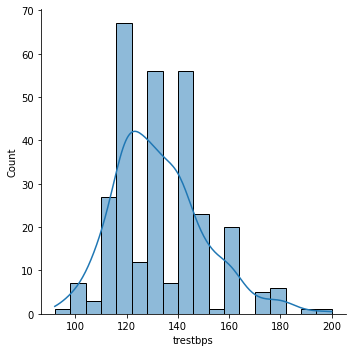

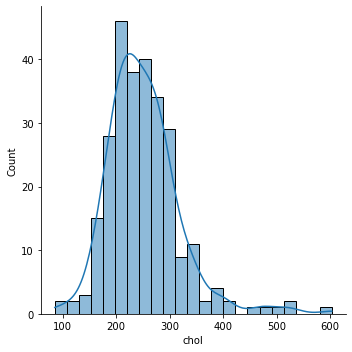

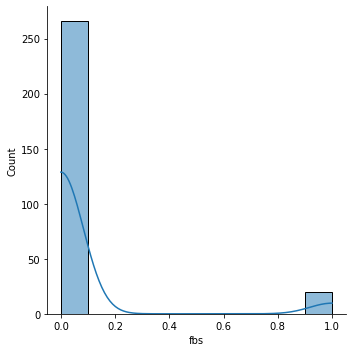

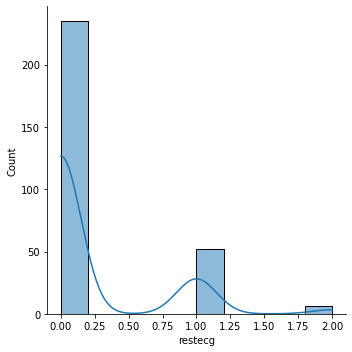

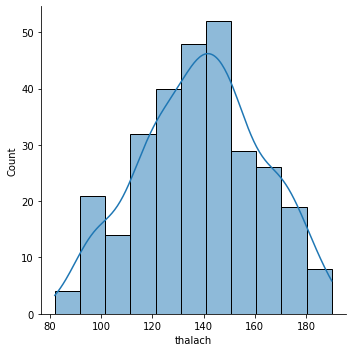

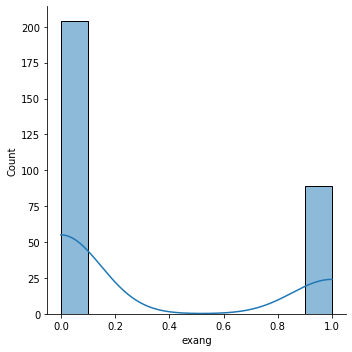

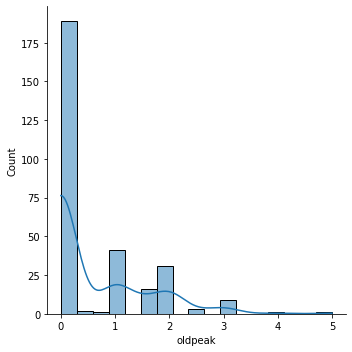

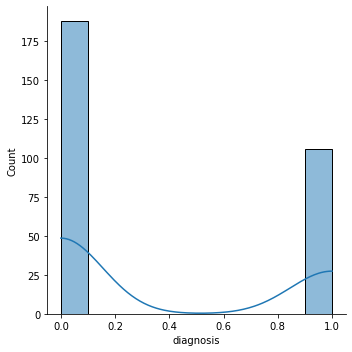

In [20]:
for i in col_names:
    sns.displot(data=dataset[i], kde = True)
    print(f'======== {i} ========')
    print(f'Skewness: {dataset[i].skew()}')
    print(f'Kurtosis: {dataset[i].kurt()}')

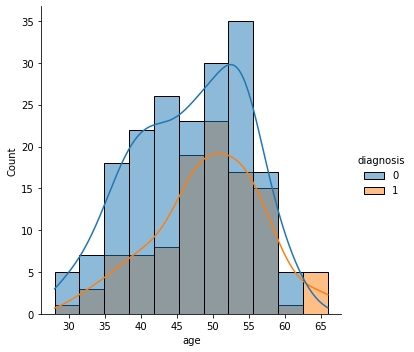

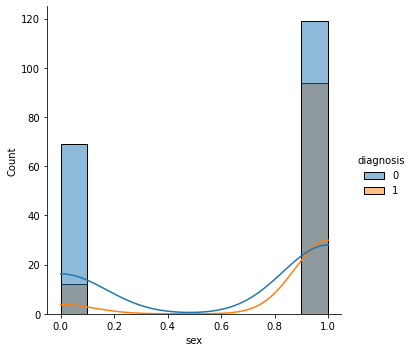

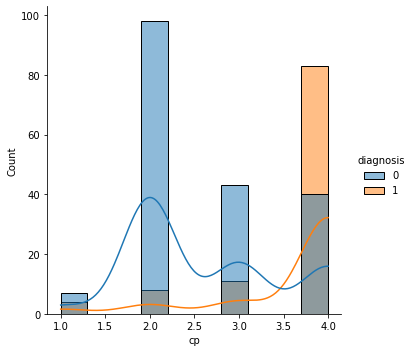

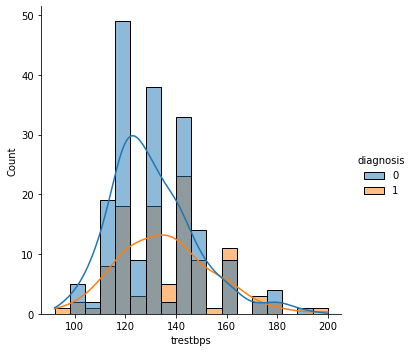

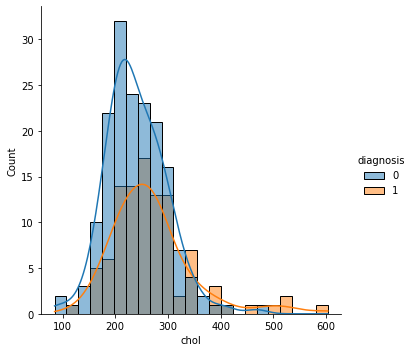

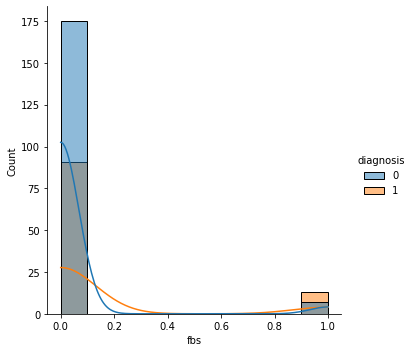

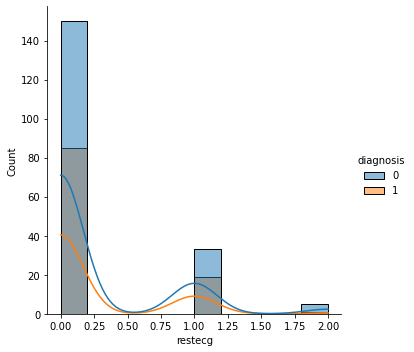

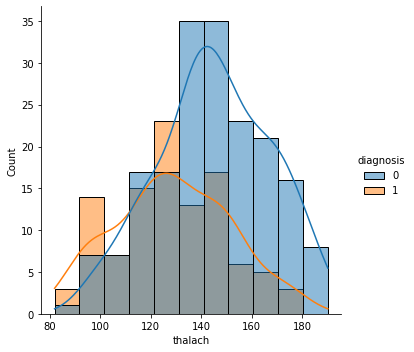

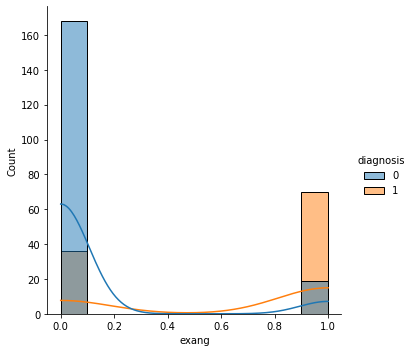

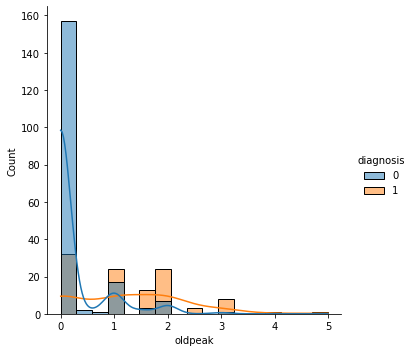

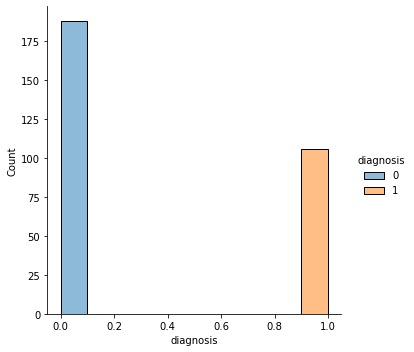

In [21]:
for i in dataset.columns:
    sns.displot(dataset, x = i, hue = 'diagnosis', kde = True)

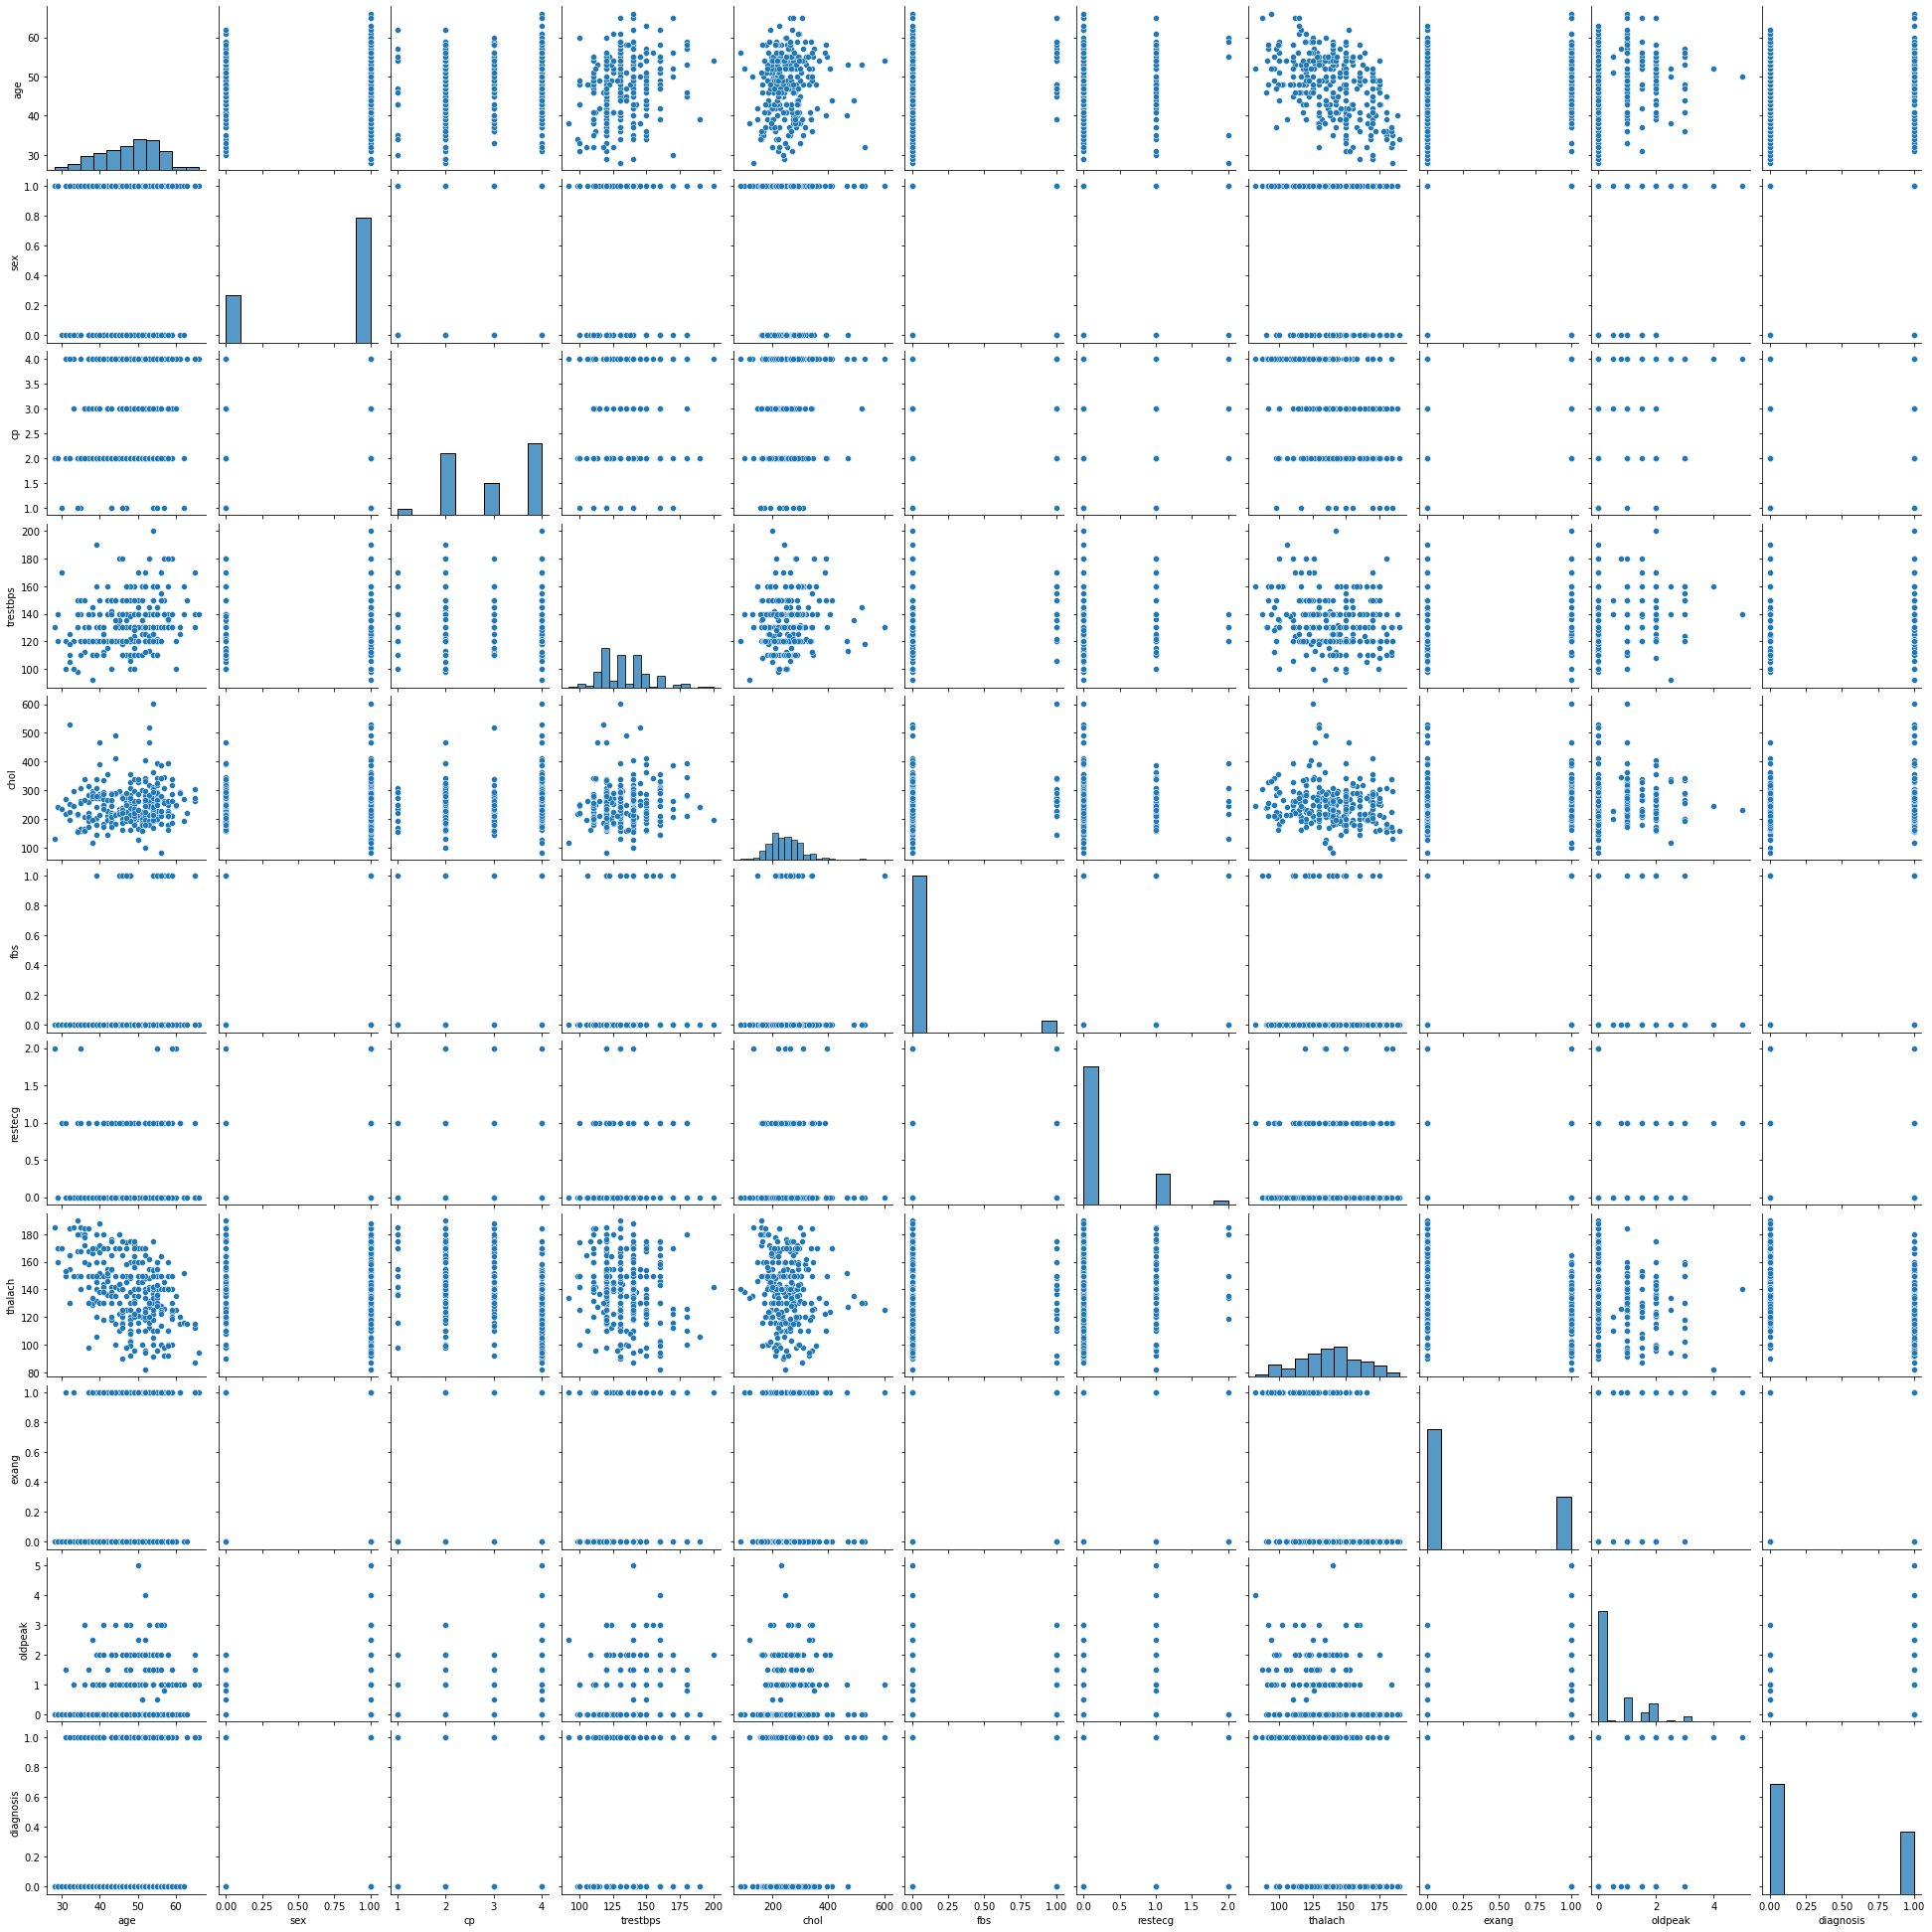

In [23]:
sns.pairplot(dataset)

In [24]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,diagnosis
age,1.000000,0.013618,0.145826,0.245203,0.090979,0.182212,0.051989,-0.459420,0.238925,0.177707,0.159315
sex,0.013618,1.000000,0.249875,0.089112,0.028797,0.042798,-0.104614,-0.111781,0.154925,0.118931,0.272781
cp,0.145826,0.249875,1.000000,0.085631,0.138847,0.033346,-0.018154,-0.370440,0.494674,0.353109,0.505864
trestbps,0.245203,0.089112,0.085631,1.000000,0.084264,0.095416,0.013914,-0.184961,0.213856,0.206848,0.139717
chol,0.090979,0.028797,0.138847,0.084264,1.000000,0.122902,0.050249,-0.127676,0.168518,0.109343,0.209318
fbs,0.182212,0.042798,0.033346,0.095416,0.122902,1.000000,0.049160,-0.071489,0.116170,0.062316,0.163232
restecg,0.051989,-0.104614,-0.018154,0.013914,0.050249,0.049160,1.000000,0.004481,0.045392,0.042193,-0.029937
thalach,-0.459420,-0.111781,-0.370440,-0.184961,-0.127676,-0.071489,0.004481,1.000000,-0.401980,-0.303028,-0.331393
exang,0.238925,0.154925,0.494674,0.213856,0.168518,0.116170,0.045392,-0.401980,1.000000,0.632108,0.583847
oldpeak,0.177707,0.118931,0.353109,0.206848,0.109343,0.062316,0.042193,-0.303028,0.632108,1.000000,0.545700


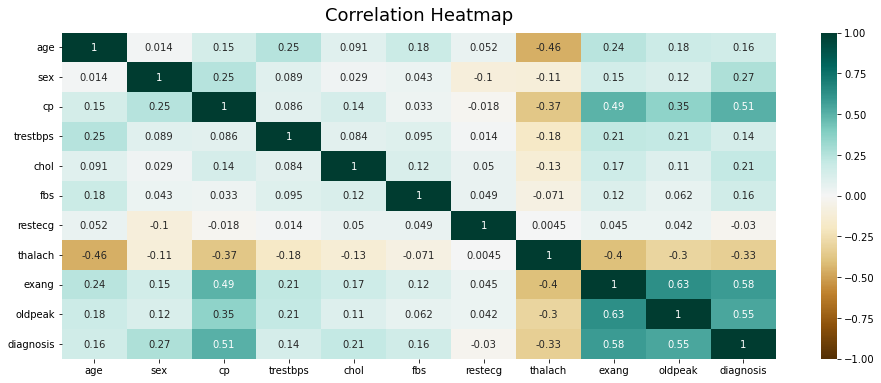

In [25]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### III. Data Cleaning <a class="anchor" id="chapter3"></a>

In [26]:
#deleting duplicated observations
dataset.drop_duplicates(subset=None, keep= 'first', inplace=True)

In [27]:
#checking continuous numerical data features that cannot be 0 with 0
(dataset[['age', 'trestbps', 'chol', 'thalach']]==0).sum()

age         0
trestbps    0
chol        0
thalach     0
dtype: int64

In [28]:
dataset.isna().sum()

age           0
sex           0
cp            0
trestbps      1
chol         22
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
diagnosis     0
dtype: int64

In [29]:
#for features that only have 1 missing value
#imputing with mean value with a criteria inside the if statement

def imputation_mean2(name):

    for i in range(len(dataset)):
        if dataset[name].isnull().values[i] == True:
#            print(dataset.iloc[[i]])
            break
#    print(i)
    mean_val = 0
    k = 0
    for j in range(len(dataset)):
        if j == i:
            mean_val = mean_val
        else: 
            if dataset['age'].values[j] == dataset['age'].values[i] and dataset['sex'].values[j] == dataset['sex'].values[i] and dataset['diagnosis'].values[j] == dataset['diagnosis'].values[i]:
                mean_val = float(dataset[name].values[j]) + mean_val
                k+=1

    dataset[name].values[i] = int(mean_val/k)

In [30]:
imputation_mean2('trestbps')
imputation_mean2('restecg')
imputation_mean2('exang')
imputation_mean2('thalach')

In [31]:
#features with more than 1 missing value (chol and fbs)
#imputing missing values with mode
dataset.chol.fillna(dataset.chol.mode()[0], inplace=True)
dataset.fbs.fillna(dataset.fbs.mode()[0], inplace=True)
dataset.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
diagnosis    0
dtype: int64

In [32]:
dataset.shape

(293, 11)

In [33]:
from sklearn.model_selection import train_test_split

# feature array
X = dataset.iloc[:,0:10].values

# label array
y = dataset.iloc[:, 10].values

# split data into training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### IV. Model Training <a class="anchor" id="chapter4"></a>

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


model_LR = LogisticRegression().fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

print(f'''
LR Score: {metrics.accuracy_score(y_test, y_pred)}

''')


LR Score: 0.8135593220338984




### V. Model Performance Metrics <a class="anchor" id="chapter5"></a>

Confusion Matrix

 True positive is: 16
 True negative is: 32
 False positive is: 8
 False negative is: 3


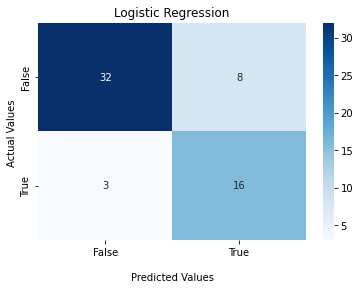

In [102]:
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion_LR = metrics.confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
#print(confusion)

#[row, column]
#classifiers = [confusion_LR, confusion_DTC, confusion_RFC]

def con_mat(i, title):
        TP = i[1, 1]
        TN = i[0, 0]
        FP = i[0, 1]
        FN = i[1, 0]
        print('')
        print(f' True positive is: {TP}')
        print(f' True negative is: {TN}')
        print(f' False positive is: {FP}')
        print(f' False negative is: {FN}')
        ax = sns.heatmap(i, annot=True, cmap='Blues')
        ax.set_title(f'{title}');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');
        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])

        ## Display the visualization of the Confusion Matrix.
        plt.show()
        
con_mat(confusion_LR, 'Logistic Regression')



In [103]:
from sklearn.metrics import precision_recall_fscore_support as score

def performance(name, y_test ,value_predicted):
    print(f'========={name}  Performance=========')
    p, r, fscore, s = score(y_test, value_predicted)

    print(f'''precision of 0: {p[0]}
precision of 1: {p[1]}
    ''')
    print(f'''recall of 0: {r[0]}
recall of 1: {r[1]}
    ''')
    print(f'''fscore of 0: {fscore[0]}
fscore of 1: {fscore[1]}
    ''')
    print(f'''score/size of 0: {s[0]}
score/size of 0: {s[1]}
    ''')
    
    
    
performance('Logistic Regression', y_test,y_pred)

=========Logistic Regression  Performance=========
precision of 0: 0.9142857142857143
precision of 1: 0.6666666666666666
    
recall of 0: 0.8
recall of 1: 0.8421052631578947
    
fscore of 0: 0.8533333333333333
fscore of 1: 0.744186046511628
    
score/size of 0: 40
score/size of 0: 19
    


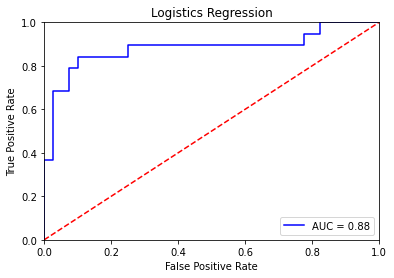

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics


def roc_auc_curve(model_name,x,y, title):
    model_name = model_name.predict_proba(x)
    preds = model_name[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.title(f'{title}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

roc_auc_curve(model_LR, X_test, y_test, 'Logistics Regression')

### The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).